In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
HR_train = pd.read_csv('train_jqd04QH.csv')
HR_test = pd.read_csv('test_KaymcHn.csv')

In [10]:
HR_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [11]:
print(HR_train.shape)
print(HR_test.shape)

(18359, 14)
(15021, 13)


In [12]:
HR_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [0]:
#Below Function gives missing values and their Percentage  from each column. 

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has "+ str(df.shape[0]) +" rows and " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [27]:
missing_values_table(HR_train)

Your selected dataframe has 18359 rows and 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [28]:
missing_values_table(HR_test)

Your selected dataframe has 15021 rows and 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### **Data Type Conversion**

In [0]:
cat_cols = ['gender','city', 'education_level','relevent_experience', 'enrolled_university',
       'major_discipline','company_size','company_type','target']

cat_col = ['gender','city', 'education_level','relevent_experience', 'enrolled_university',
       'major_discipline','company_size','company_type']

num_col = ['experience','last_new_job'] 

In [0]:
HR_train[cat_cols] = HR_train[cat_cols].apply(lambda x: x.astype('category'))
HR_test[cat_col] = HR_test[cat_col].apply(lambda x: x.astype('category'))

In [0]:
HR_train['experience'] = pd.to_numeric(HR_train['experience'],errors='coerce')
HR_train['last_new_job'] = pd.to_numeric(HR_train['last_new_job'],errors='coerce')
#### Test 
HR_test['experience'] = pd.to_numeric(HR_test['experience'],errors='coerce')
HR_test['last_new_job'] = pd.to_numeric(HR_test['last_new_job'],errors='coerce')


In [19]:
HR_train.dtypes

enrollee_id                  int64
city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                 float64
company_size              category
company_type              category
last_new_job               float64
training_hours               int64
target                    category
dtype: object

#### **Test Data Missing Values Imputation**

#### Train Data

In [0]:
HR_train['company_size'].fillna(HR_train['company_size'].value_counts().index[0],inplace=True)
HR_train['company_type'].fillna(HR_train['company_type'].value_counts().index[0],inplace=True)
HR_train['gender'].fillna(HR_train['gender'].value_counts().index[0],inplace=True)
HR_train['major_discipline'].fillna(HR_train['major_discipline'].value_counts().index[0],inplace=True)
HR_train['education_level'].fillna(HR_train['education_level'].value_counts().index[0],inplace=True)
HR_train['enrolled_university'].fillna(HR_train['enrolled_university'].value_counts().index[0],inplace=True)
## Num data
HR_train.experience.fillna(HR_train['experience'].mean(),inplace=True)
HR_train.last_new_job.fillna(HR_train['last_new_job'].mean(),inplace=True)

#### Test Data

In [0]:
HR_test['company_size'].fillna(HR_test['company_size'].value_counts().index[0],inplace=True)
HR_test['company_type'].fillna(HR_test['company_type'].value_counts().index[0],inplace=True)
HR_test['gender'].fillna(HR_test['gender'].value_counts().index[0],inplace=True)
HR_test['major_discipline'].fillna(HR_test['major_discipline'].value_counts().index[0],inplace=True)
HR_test['education_level'].fillna(HR_test['education_level'].value_counts().index[0],inplace=True)
HR_test['enrolled_university'].fillna(HR_test['enrolled_university'].value_counts().index[0],inplace=True)
## Num data 
HR_test.experience.fillna(HR_test['experience'].mean(),inplace=True)
HR_test.last_new_job.fillna(HR_test['last_new_job'].mean(),inplace=True)

In [18]:
HR_test.major_discipline.value_counts()

STEM               11117
Humanities           524
Other                335
Business Degree      278
Arts                 193
No Major             181
Name: major_discipline, dtype: int64

In [35]:
HR_train.describe()


,enrollee_id,city_development_index,experience,last_new_job,training_hours
count,18359.000000,18359.000000,14447.000000,12467.000000,18359.000000
mean,16729.360096,0.847140,8.409497,1.641935,65.899014
std,9643.749725,0.110189,4.968455,0.945643,60.885300
min,1.000000,0.448000,1.000000,1.000000,1.000000
25%,8378.500000,0.796000,4.000000,1.000000,23.000000
50%,16706.000000,0.910000,7.000000,1.000000,47.000000
75%,25148.500000,0.920000,12.000000,2.000000,89.000000
max,33380.000000,0.949000,20.000000,4.000000,336.000000


#### **Feature Details**

Variable - Description




* enrollee_id- Unique ID for enrollee
* city - City code
* city_development_index - Developement index of the city (scaled)
* gender - Gender
* relevent_experience - Relevent experience
* enrolled_university - Type of University course enrolled if any
* education_level - Education level
* major_discipline - Major discipline
* experience Total - experience in years
* company_size - No of employees in current employer's company
* company_type - Type of current employer
* last_new_job - Difference in years between previous job and current job
* training_hours - training hours completed
* target 0 – Not looking for job change, 1 – Looking for a job change

In [22]:
HR_train.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,100-500,Pvt Ltd,1.0,106,0


In [23]:
HR_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

#### **EDA and Visualization**

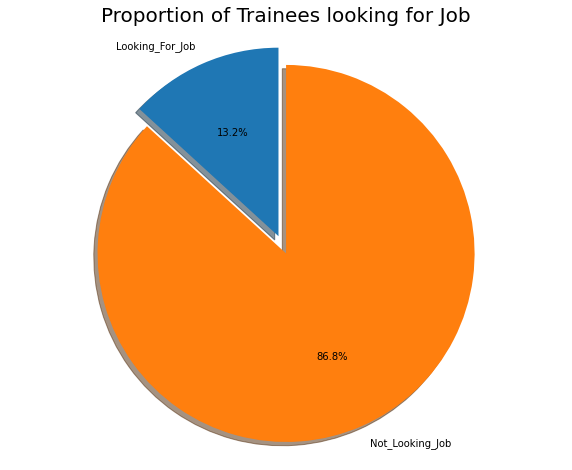

In [24]:
labels = 'Looking_For_Job', 'Not_Looking_Job'
sizes = [HR_train.target[HR_train['target']==1].count(),HR_train.target[HR_train['target']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Trainees looking for Job", size = 20)
plt.show()

In [25]:
HR_train.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   21
company_size                  8
company_type                  6
last_new_job                  5
training_hours              241
target                        2
dtype: int64

In [26]:
HR_test.nunique()

enrollee_id               15021
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   21
company_size                  8
company_type                  6
last_new_job                  5
training_hours              241
dtype: int64

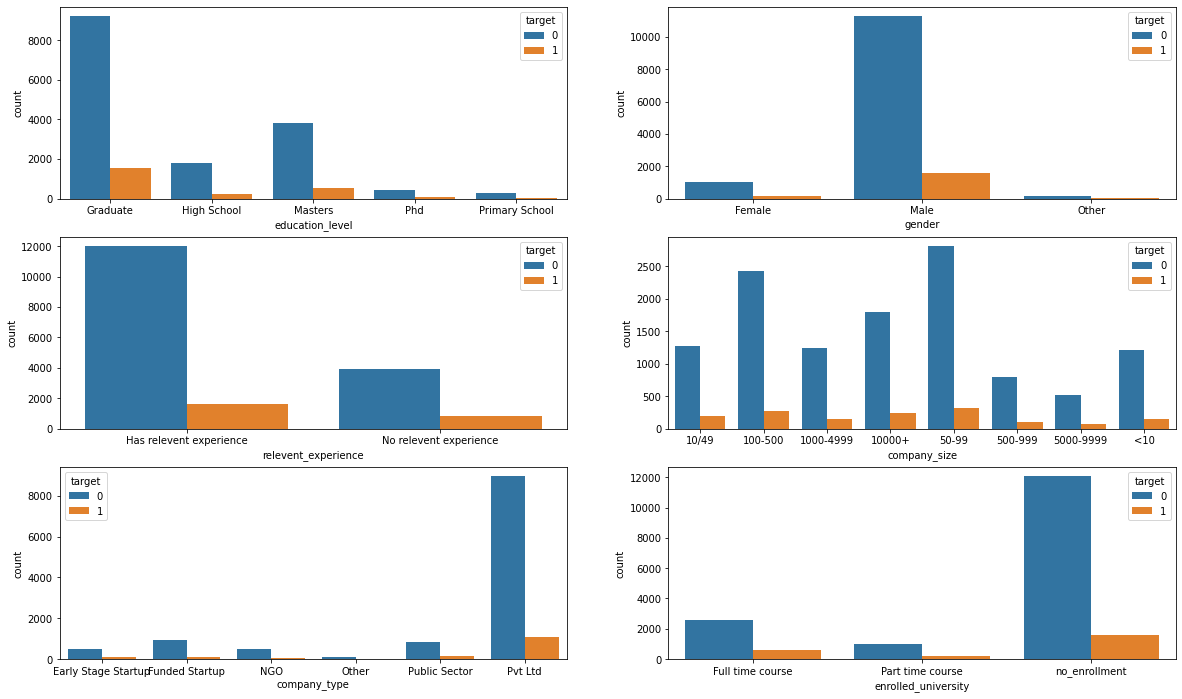

In [71]:
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.countplot(x='education_level', hue = 'target',data = HR_train, ax=axarr[0][0])
    sns.countplot(x='gender', hue = 'target',data = HR_train, ax=axarr[0][1])
    sns.countplot(x='relevent_experience', hue = 'target',data = HR_train, ax=axarr[1][0])
    sns.countplot(x='company_size', hue = 'target',data = HR_train, ax=axarr[1][1])
    sns.countplot(x='company_type', hue = 'target',data = HR_train, ax=axarr[2][0])
    sns.countplot(x='enrolled_university', hue = 'target',data = HR_train, ax=axarr[2][1])

In [0]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

In [64]:
HR_train.dtypes

enrollee_id                  int64
city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                 float64
company_size              category
company_type              category
last_new_job               float64
training_hours               int64
target                    category
dtype: object

#### **Dummification oof categorical columns**

In [0]:
dumm_cat_cols = ['gender','relevent_experience', 'city','enrolled_university','major_discipline','company_type']
other_req_cols = ['city_development_index','last_new_job','training_hours','target']
other_req_cols_tst = ['city_development_index','last_new_job','training_hours']

In [0]:
HR_train_other = HR_train.loc[:,other_req_cols]
HR_train_cat = HR_train.loc[:,dumm_cat_cols]
#### Test Data
HR_test_other = HR_test.loc[:,other_req_cols_tst]
HR_test_cat = HR_test.loc[:,dumm_cat_cols]

In [0]:
HR_train_data = pd.get_dummies(HR_train_cat,drop_first = True)
HR_test_data = pd.get_dummies(HR_test_cat,drop_first = True)

In [38]:
HR_train_data.head()

,gender_Male,gender_Other,relevent_experience_No relevent experience,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,city_city_142,city_city_143,...,city_city_67,city_city_69,city_city_7,city_city_70,city_city_71,city_city_72,city_city_73,city_city_74,city_city_75,city_city_76,city_city_77,city_city_78,city_city_79,city_city_8,city_city_80,city_city_81,city_city_82,city_city_83,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99,enrolled_university_Part time course,enrolled_university_no_enrollment,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [0]:
HR_train_data.reset_index(drop=True, inplace=True)
HR_train_other.reset_index(drop=True, inplace=True)

In [0]:
HR_train_data = pd.concat([HR_train_data,HR_train_other],axis=1)
### Test Data 
HR_test_data = pd.concat([HR_test_data,HR_test_other],axis=1)

In [41]:
HR_test_data.isnull().sum()

gender_Male                                   0
gender_Other                                  0
relevent_experience_No relevent experience    0
city_city_10                                  0
city_city_100                                 0
                                             ..
company_type_Public Sector                    0
company_type_Pvt Ltd                          0
city_development_index                        0
last_new_job                                  0
training_hours                                0
Length: 140, dtype: int64

In [42]:
HR_train_data.isnull().sum()

gender_Male                                   0
gender_Other                                  0
relevent_experience_No relevent experience    0
city_city_10                                  0
city_city_100                                 0
                                             ..
company_type_Pvt Ltd                          0
city_development_index                        0
last_new_job                                  0
training_hours                                0
target                                        0
Length: 141, dtype: int64

In [43]:
print(HR_train_data.shape)
print(HR_test_data.shape)

(18359, 141)
(15021, 140)


#### **Train/Validation Split**

In [0]:
from sklearn.model_selection import train_test_split 

In [47]:
train_x,val_x,train_y,val_y = train_test_split(HR_train_data.iloc[:,:-1],HR_train_data.iloc[:,-1],test_size=0.3,random_state=1)
print(HR_train_data.shape)
print(train_x.shape)
print(val_x.shape)

(18359, 141)
(12851, 140)
(5508, 140)


#### **Start Model Building**

In [0]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

In [48]:

# Fitting a simple Logistic Regression on CountVect
logreg = LogisticRegression()
lr_clf = logreg.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
#Predicting on train data
train_pred = lr_clf.predict(train_x)
#Predicting on val data
val_pred=lr_clf.predict(val_x)
# Predict on Test data
#test_pred=lr_clf.predict()

In [52]:
print("Train_Classification Report: \n\n", classification_report(train_y,train_pred))
print("\n\nTest_Classification Report: \n\n", classification_report(val_y,val_pred))

Train_Classification Report: 

               precision    recall  f1-score   support

           0       0.87      1.00      0.93     11148
           1       0.00      0.00      0.00      1703

    accuracy                           0.87     12851
   macro avg       0.43      0.50      0.46     12851
weighted avg       0.75      0.87      0.81     12851



Test_Classification Report: 

               precision    recall  f1-score   support

           0       0.87      1.00      0.93      4786
           1       0.00      0.00      0.00       722

    accuracy                           0.87      5508
   macro avg       0.43      0.50      0.46      5508
weighted avg       0.76      0.87      0.81      5508



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
